In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('/uscms/home/jieun201/nobackup/YOURWORKINGAREA/dec6_ds8/TrainSet.csv')  #randomly selected 5000k clusters

In [3]:
df_2_test = df1[100000:600000]
df_2_test = df_2_test.reset_index(drop=True)
df_2_test

,y-local,pt,0,1,2,3,4,5,6,7,...,264,265,266,267,268,269,270,271,272,ptLabel
0,-2.78621,-0.149006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,3.35684,0.370930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.33228,-0.187830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2.95454,0.177889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2.26443,0.304396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0.86820,-0.541485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
499996,-5.03404,0.678523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
499997,7.67527,-0.180700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
499998,-1.02071,-0.191228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [4]:
Label = df_2_test['ptLabel']
LabelDF = pd.DataFrame(Label)

In [5]:
readInTracked = pd.read_csv('trainingSetTrackedOutputNumpyArray.csv') 
readInTracked

,y,x
0,5.590935,11.763610
1,0.741178,-2.949967
2,6.185787,11.952291
3,0.229251,-4.252941
4,8.115126,6.465592
...,...,...
499995,4.758145,0.192130
499996,6.679837,8.461007
499997,0.670506,-4.115416
499998,2.909358,-0.414306


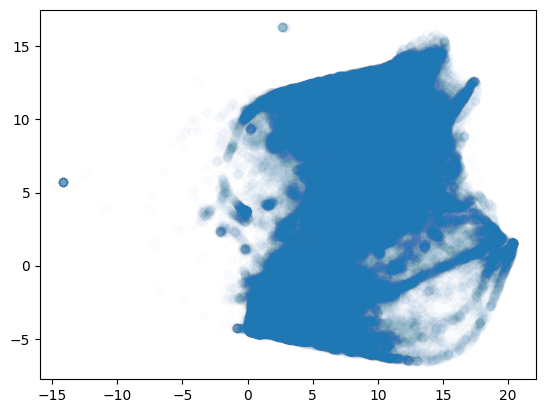

In [6]:
#ALL TRACKED
plt.scatter(readInTracked['y'],readInTracked['x'], alpha=0.01) 

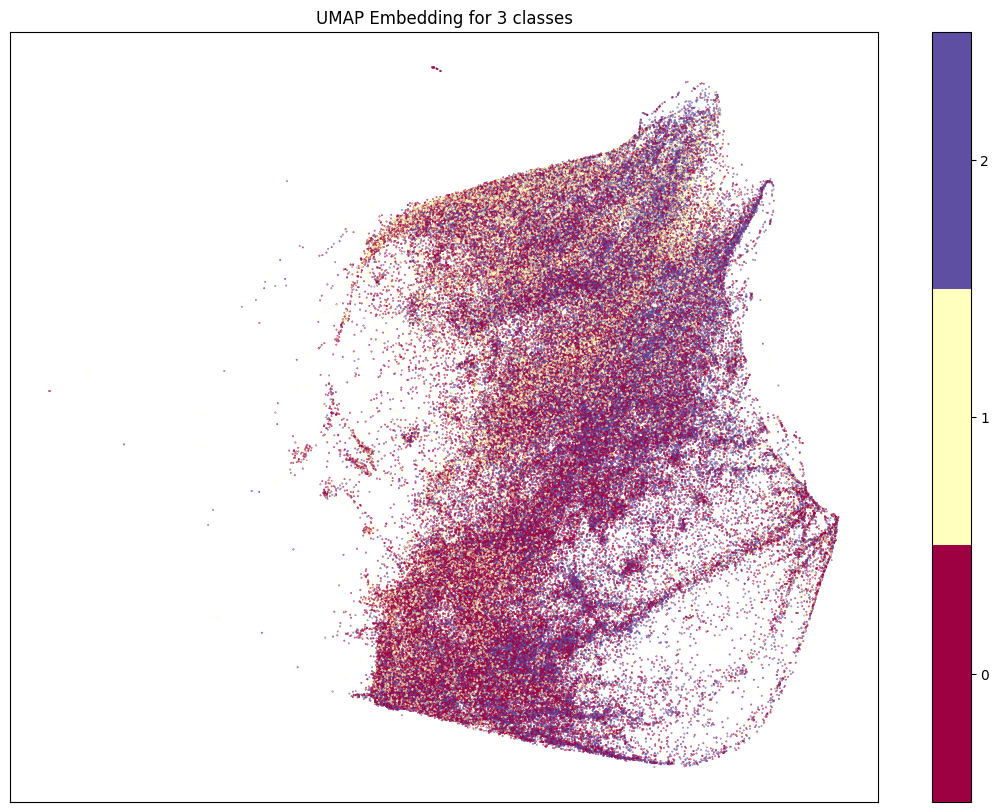

In [7]:
classes = ['0', '1', '2']
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(readInTracked['y'],readInTracked['x'], s=0.1, c=Label.values, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(4)-0.5)
cbar.set_ticks(np.arange(3))
cbar.set_ticklabels(classes)
plt.title('UMAP Embedding for 3 classes');

In [8]:
concat = pd.concat([readInTracked['y'],readInTracked['x'],LabelDF],join='inner', axis=1)
concat

,y,x,ptLabel
0,5.590935,11.763610,1
1,0.741178,-2.949967,0
2,6.185787,11.952291,1
3,0.229251,-4.252941,2
4,8.115126,6.465592,0
...,...,...,...
499995,4.758145,0.192130,0
499996,6.679837,8.461007,0
499997,0.670506,-4.115416,1
499998,2.909358,-0.414306,1


In [10]:
#from scipy.stats import gaussian_kde
##nbins = 300
#y = concat['x'] 
#x = concat['y'] 

#k = gaussian_kde([x,y])
##xi, yi = np.mgrid[
 #  x.min():x.max():nbins*1j,
 #  y.min():y.max():nbins*1j
#]
#zi = k(np.vstack([
#   xi.flatten(),
#   yi.flatten()
#])).reshape(xi.shape)

#fig, ax = plt.subplots(figsize=(8,8))
#ax.pcolormesh(xi, yi, zi)
#plt.show()

In [11]:
filter1 = concat[concat['ptLabel'] == 0]
filter1

,y,x,ptLabel
1,0.741178,-2.949967,0
4,8.115126,6.465592,0
5,0.879127,-3.072423,0
6,5.907983,11.674059,0
7,3.664483,-0.218484,0
...,...,...,...
499992,5.238191,12.303908,0
499993,7.535234,-1.885060,0
499995,4.758145,0.192130,0
499996,6.679837,8.461007,0


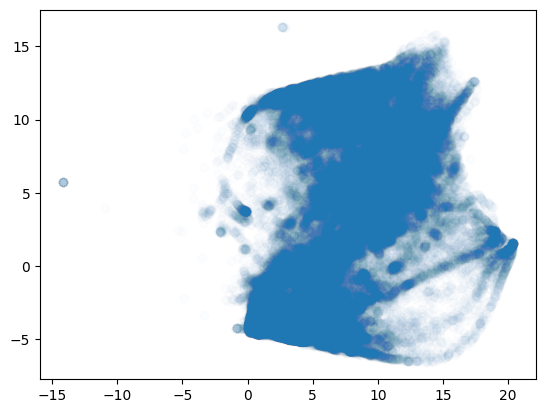

In [12]:
plt.scatter(filter1['y'],filter1['x'], alpha=0.01)

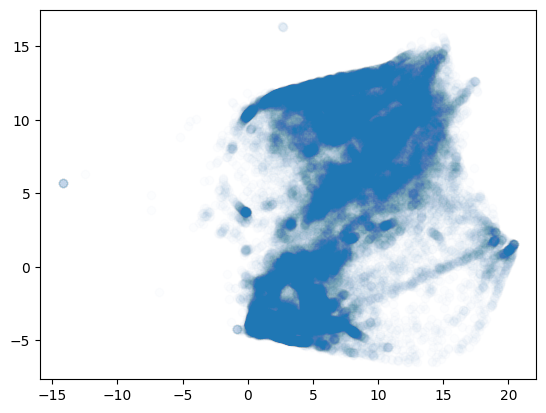

In [13]:
filter2 = concat[concat['ptLabel'] == 1]
filter2
plt.scatter(filter2['y'],filter2['x'], alpha=0.01)

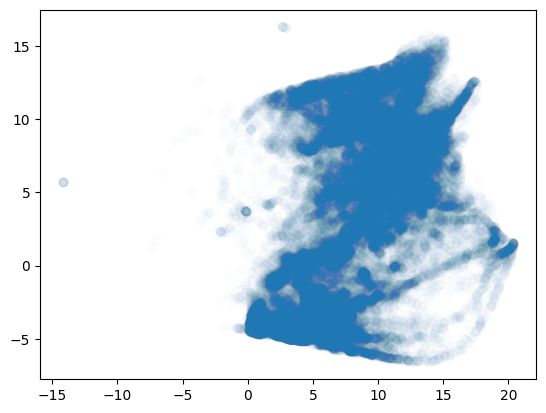

In [14]:
filter3 = concat[concat['ptLabel'] == 2]
filter3
plt.scatter(filter3['y'],filter3['x'], alpha=0.01)
#filter3

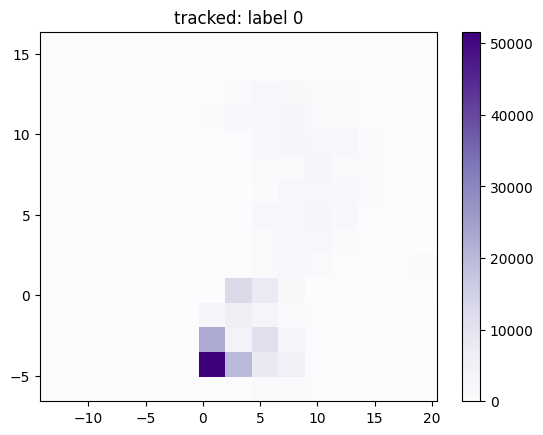

In [15]:
#https://python-graph-gallery.com/85-density-plot-with-matplotlib/ 
y = filter1['x'] # change 'x' with your column name
x = filter1['y'] # change 'y' with your column name
plt.hist2d(x, y, bins=(15, 15), cmap=plt.cm.Purples)
plt.colorbar()
plt.title("tracked: label 0")
plt.show()

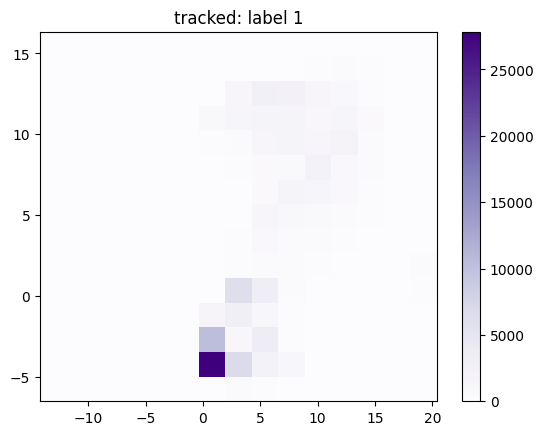

In [16]:
#https://python-graph-gallery.com/85-density-plot-with-matplotlib/ 
y = filter2['x'] # change 'x' with your column name
x = filter2['y'] # change 'y' with your column name
plt.hist2d(x, y, bins=(15, 15), cmap=plt.cm.Purples)
plt.colorbar()
#plt.show()
plt.title("tracked: label 1")
plt.show()

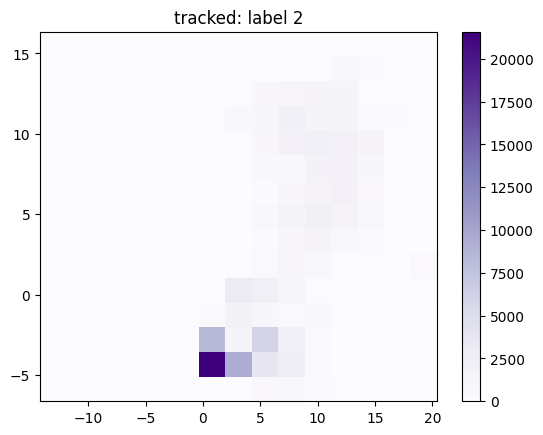

In [17]:
#https://python-graph-gallery.com/85-density-plot-with-matplotlib/ 
y = filter3['x'] # change 'x' with your column name
x = filter3['y'] # change 'y' with your column name
plt.hist2d(x, y, bins=(15, 15), cmap=plt.cm.Purples)
plt.colorbar()
#plt.show()
plt.title("tracked: label 2")
plt.show()

In [18]:
readInUntracked = pd.read_csv('testOutputNumpyArray.csv')
readInUntracked

,y,x
0,12.921468,-0.937055
1,1.912664,8.173426
2,0.572988,10.722281
3,-1.686624,5.158303
4,-2.926026,5.181519
...,...,...
499995,-2.669503,7.106689
499996,16.024206,-3.166832
499997,2.663023,0.967288
499998,-5.413665,8.943275


In [ ]:
#from matplotlib import colormaps
#list(colormaps)

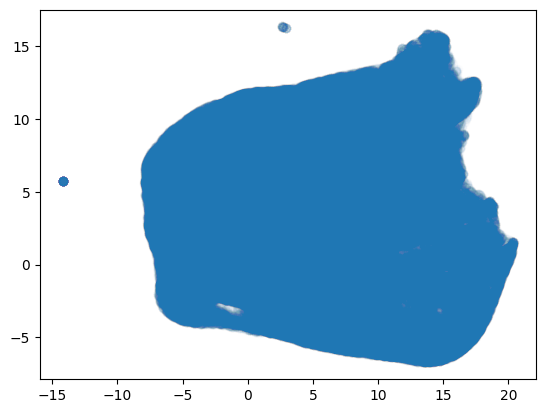

In [19]:
plt.scatter(readInUntracked['y'],readInUntracked['x'], alpha=0.01)

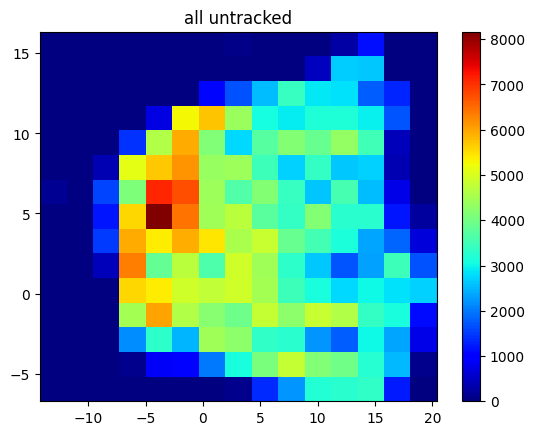

In [20]:
#https://python-graph-gallery.com/85-density-plot-with-matplotlib/ 
y = readInUntracked['x'] # change 'x' with your column name
x = readInUntracked['y'] # change 'y' with your column name
plt.hist2d(x, y, bins=(15, 15), cmap=plt.cm.jet)
plt.colorbar()
#plt.show()
plt.title("all untracked")
plt.show()

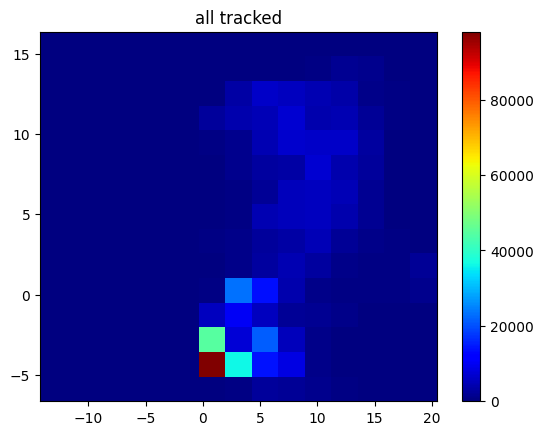

In [21]:
#https://python-graph-gallery.com/85-density-plot-with-matplotlib/ 
y = concat['x'] # change 'x' with your column name
x = concat['y'] # change 'y' with your column name
plt.hist2d(x, y, bins=(15, 15), cmap=plt.cm.jet)
plt.colorbar()
#plt.show()
plt.title("all tracked")
plt.show()